# Get Started

## Introduction

The ASTx library is an agnostic framework for constructing and representing Abstract Syntax Trees (ASTs). Its primary objective is to provide a versatile and language-independent structure for ASTs, with the flexibility to be utilized across various programming languages and parsing tools. ASTx doesn't aim to be a lexer or a parser, although it could be used by any programming language or parser in order to provide a high level representation of the AST.

Many kinds of nodes (classes) are currently supported. Below is a list with just some examples:

##### Statements:
* Function
* Function Prototype
* FunctionReturn
* ForRangeLoop 
* VarDecl

##### Operators:
* BinaryOp
* UnaryOp

##### Data types:
* Boolean
* Literal 
* Variable 


The ASTx project is still under development, so new classes may be added to the ones above at any time.

Below are installation instructions and an example, so you can have an overview of how you can leverage the ASTx library for your needs.

## Installation
The first step is to install ASTx. You can do it simply by running the command below in your terminal:\
`$ pip install astx`\
If you need more information on installation, you can get it in the [ASTx installation page](https://github.com/arxlang/astx/blob/main/docs/installation.md).
After that, you can just open a Jupyter Notebook instance and start writing your first AST.


## Example: an AST of a series of mathematical operations
Here we will present a quick example of an AST of the expression \
`basic_op = lit_1 + b - a * c / a + (b - a / a)`, in which \
$~~~~$ `lit_1` is a defined integer, and \
$~~~~$ `a`, `b`, and `c` are variables.\
The first thing to do is, in your Jupyter Notebook instance, import `display`, which will allow you to have a basic visualization of the AST, and the astx library itself. 

In [1]:
# import display for AST visualization
from IPython.display import display
import astx

Then we create an instance of the Module class, and this instance will be the first node of the tree, or the root node. After that, we declare the variables and literal that will be part of the basic operation that we will parse into an AST.

In [2]:
# Create module
module = astx.Module()

# Declare variables
decl_a = astx.VariableDeclaration(name="a", type_=astx.Int32, value=astx.LiteralInt32(1))
decl_b = astx.VariableDeclaration(name="b", type_=astx.Int32, value=astx.LiteralInt32(2))
decl_c = astx.VariableDeclaration(name="c", type_=astx.Int32, value=astx.LiteralInt32(4))

a = astx.Variable(name="a")
b = astx.Variable(name="b")
c = astx.Variable(name="c")

# Declare literal
lit_1 = astx.LiteralInt32(1)

# State the expression
basic_op = lit_1 + b - a * c / a + (b - a / a)

After the basic expression is stated, we create an instance of the Function class. As mentioned in the API documentation, each instance of the Function class must have a prototype and a body, so we'll create those first.

The body is made of a block that is created and the variables, as well as the basic operation, are appended to it afterwards.

In [3]:
# Create FunctionPrototype
main_proto = astx.FunctionPrototype(
    name="main", args=[], return_type=astx.Int32
)

# Create FunctionReturn
main_block = astx.Block()
main_block.append(decl_a)
main_block.append(decl_b)
main_block.append(decl_c)
main_block.append(astx.FunctionReturn(basic_op))

# Create Function
main_fn = astx.Function(prototype=main_proto, body=main_block)

# Append function to module
module.block.append(main_fn)

After this, the module is complete. We can get its AST structure as a dictionary, as well as a PNG representation.

In [4]:
# Create dictionary representation
module.get_struct()

{'MODULE[main]': {'value': [{'FUNCTION[main]': {'value': {'args': {'value': [],
       'metadata': {'loc': {line: -1, col: -1},
        'comment': '',
        'ref': '',
        'kind': <ASTKind.FunctionKind: -401>}},
      'body': {'value': {'BLOCK': {'value': [{'VariableDeclaration[a, Int32]': {'value': {'Literal[Int32]: 1': {'value': 1,
              'metadata': {'loc': {line: -1, col: -1},
               'comment': '',
               'ref': '8c9233184d06429f85cf0b85e6cd28e5',
               'kind': <ASTKind.GenericKind: -100>}}},
            'metadata': {'loc': {line: -1, col: -1},
             'comment': '',
             'ref': '',
             'kind': <ASTKind.VarDeclKind: -202>}}},
          {'VariableDeclaration[b, Int32]': {'value': {'Literal[Int32]: 2': {'value': 2,
              'metadata': {'loc': {line: -1, col: -1},
               'comment': '',
               'ref': '0ff2082a36354a41a4d6abfb0a04c574',
               'kind': <ASTKind.GenericKind: -100>}}},
            'me

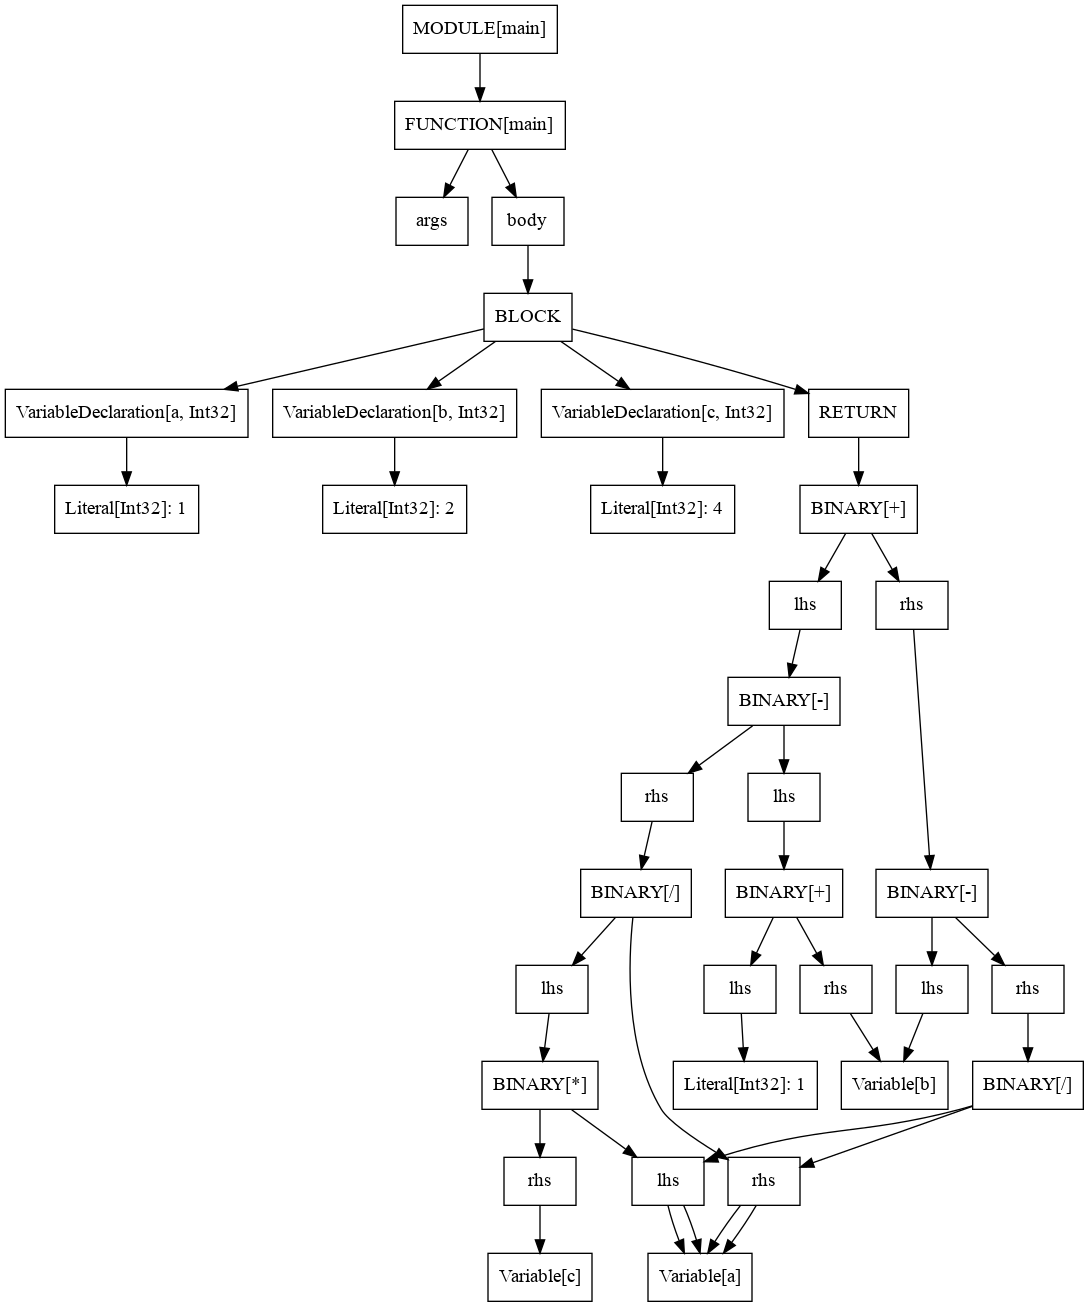

In [5]:
# Create PNG representation
module

We can also get the PNG representation of parts of the AST, such as `basic_op` and the variable `a`:

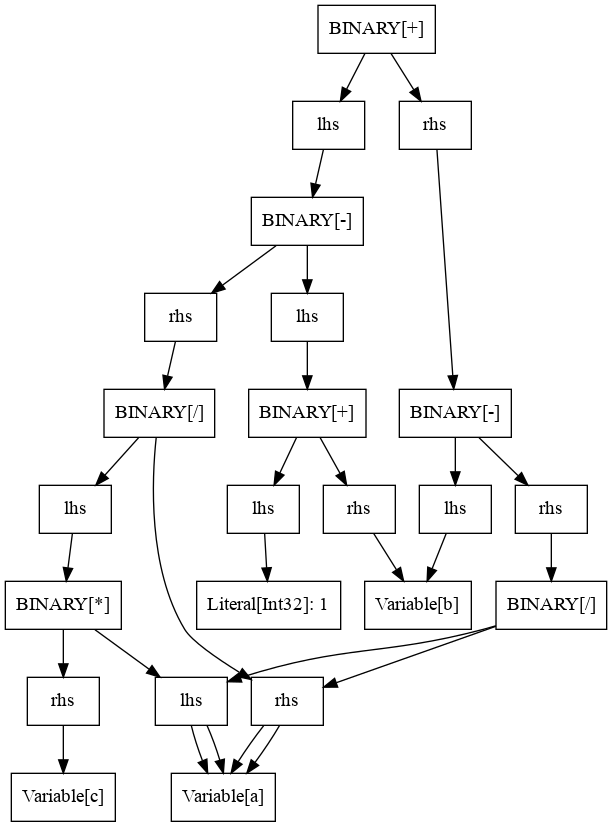

In [6]:
# Create PNG representation
basic_op

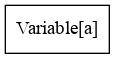

In [7]:
# Create PNG representation
a

## Custom shapes

It is also possible to use custom shapes for the output using the function `viz.visualize`. The Default shape is `box`, but  `diamond`, `ellipse`, and `circle` are also avaiable options. 

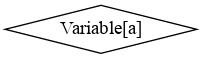

In [8]:
# Import visualization module
from astx import viz

# Create PNG representation with diamond shape
viz.visualize(a.get_struct(), shape="diamond")

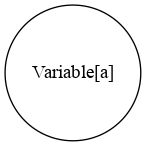

In [9]:
# Create PNG representation with circle shape
viz.visualize(a.get_struct(), shape="circle")

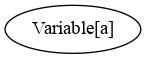

In [10]:
# Create PNG representation with ellipse shape
viz.visualize(a.get_struct(), shape="ellipse")

# Conclusion

This guide provides clear instructions and a simple example for you to start using the ASTx library. But this is just the beginning of your journey. Make sure to check out the other tutorials available, such as the one for [variables](https://github.com/arxlang/astx/blob/main/docs/tutorials/variables.ipynb) and the one for [functions](https://github.com/arxlang/astx/blob/main/docs/tutorials/functions.ipynb).